In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-06-01 12:30:37.430876: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


# Split df into endurance and the rest

In [7]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
with open(data_dir + 'in_situ_obs_with_ascat_params_9000_images.pickle', 'rb') as handle:
    ascat_dict = pickle.load(handle)

In [8]:
lat_endurance = ascat_dict['Endurance_8']['lat'][0]
lat_endurance

44.6393

In [9]:
lon_endurance = ascat_dict['Endurance_8']['lon'][0]
lon_endurance

-124.304

In [10]:
df['lat']

0        44.6393
1        44.6393
2        44.6393
3        44.6393
4        44.6393
          ...   
10195    59.9337
10196    59.9337
10197    59.9337
10198    59.9337
10199    59.9337
Name: lat, Length: 10200, dtype: float64

In [11]:
endurance_df = df.loc[((df['lat'] == lat_endurance) & (df['lon'] == lon_endurance))]
endurance_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,0.018966,-0.594677,358.100003,2471.372944,1016.386556,1017.603003,6.516033,6.581048,79.929251,79.539752,...,55.719997,101.059998,146.349991,40.459999,30.599998,40.480000,20190606T172400Z,20190606T190258.125000Z,3.139910,-0.480648
9239,0.117299,-0.672016,306.710004,2470.012630,1016.904381,1018.113492,6.858100,6.967579,75.178500,74.175803,...,-25.459999,-70.239998,-115.000000,47.000000,36.430000,47.009998,20190606T183900Z,20190606T201758.125000Z,4.053570,0.802673
9240,-0.202790,-0.338547,304.284998,2469.199633,1017.037615,1018.248502,7.083076,7.198158,79.840050,78.977536,...,112.959999,68.150002,23.459999,58.579998,47.389999,58.439999,20190607T030900Z,20190607T045058.125000Z,4.663450,0.584319
9241,-0.158690,-0.265731,345.339999,2469.292713,1017.281224,1018.491504,7.088302,7.190713,78.672100,77.872570,...,112.959999,68.150002,23.459999,58.579998,47.389999,58.439999,20190607T030900Z,20190607T045058.125000Z,4.481067,-0.841521


In [12]:
not_endurance_df = df.loc[~((df['lat'] == lat_endurance) & (df['lon'] == lon_endurance))]
not_endurance_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
548,0.113976,-0.135600,368.500055,2445.270174,1021.901288,1023.069957,11.962166,12.377113,71.661124,69.656357,...,118.930000,73.939995,29.029999,53.959999,42.869999,53.899998,20130529T220000Z,20130529T234158.125000Z,-6.597255,-1.833089
549,-0.014471,-0.120929,362.121919,2445.131856,1022.891239,1024.060199,12.833504,13.200377,76.160202,74.471500,...,54.129997,100.040001,145.830002,60.359997,48.980000,60.389999,20130530T113600Z,20130530T131458.125000Z,-6.461136,-2.079781
550,-0.037062,-0.060154,409.239282,2444.968851,1022.957700,1024.125722,13.042352,13.404786,76.311600,74.620695,...,54.129997,100.040001,145.830002,60.359997,48.980000,60.389999,20130530T113600Z,20130530T131458.125000Z,-6.537496,-1.926029
551,0.102161,-0.051391,369.036164,2445.191700,1022.204719,1023.373172,12.028556,12.450769,71.544346,69.485583,...,-146.199997,-100.610001,-54.930000,54.139999,42.869999,54.110001,20130531T230000Z,20130601T004158.125000Z,-6.339404,-3.582880
552,0.043799,-0.270238,363.438272,2444.951085,1021.556901,1022.724500,12.463280,12.850843,73.969745,72.166180,...,-29.179998,-74.110001,-119.119995,54.509998,43.450001,54.579998,20130601T123300Z,20130601T141458.125000Z,-4.966591,-3.867437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [13]:
endurance_df = endurance_df.sample(frac = 1, random_state=77)
not_endurance_df = not_endurance_df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [14]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

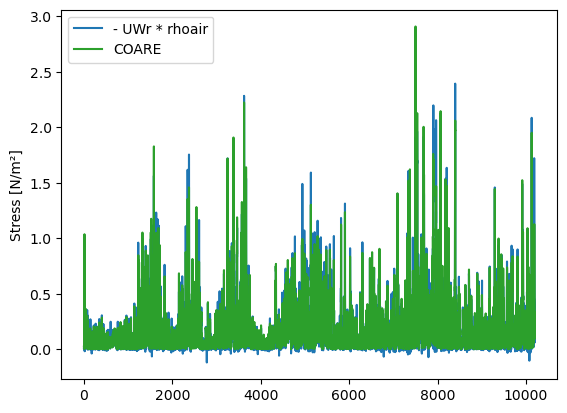

In [15]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

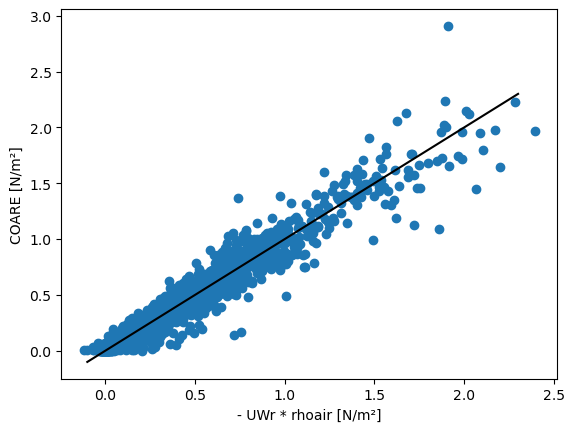

In [16]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

# Remove some extreme values

In [17]:
endurance_df = endurance_df[( (endurance_df['UWr'] >= -2) & (endurance_df['UWr'] <= 2) )]   
not_endurance_df = not_endurance_df[( (not_endurance_df['UWr'] >= -2) & (not_endurance_df['UWr'] <= 2) )]   

# Prepare features and labels

In [18]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10',
    'lat', 'lon'
]

In [19]:
x_train = not_endurance_df[predictor_variables]
x_train

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10,lat,lon
1267,-23.351065,-18.710705,-23.500668,-144.580002,-98.540001,-52.489998,60.459999,48.969997,60.369999,6.452749,1.348123,40.133400,-70.778500
4268,-20.124104,-15.160162,-21.156212,121.500000,76.299995,31.049999,50.029999,39.070000,50.059998,-7.629920,-2.160075,10.050802,-125.032317
4947,-17.229168,-13.480191,-19.976257,-35.450001,-81.559998,-127.689995,56.829998,45.239998,56.649998,11.505187,-4.050104,-54.404100,-89.206900
9776,-14.671740,-14.446085,-19.795128,-16.219999,-60.859997,-105.479996,49.919998,39.149998,49.939999,1.522213,-11.364589,59.933700,-39.473780
8042,-18.345875,-11.721573,-19.200460,57.329998,102.729996,148.169998,38.919998,29.139999,38.669998,6.045154,7.037160,59.933700,-39.473780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6908,-29.779146,-26.109320,-33.694344,51.829998,97.889999,143.869995,57.169998,45.759998,57.199997,-2.427583,-1.119574,59.933700,-39.473780
715,-21.656412,-17.176796,-22.984556,-146.190002,-100.639999,-55.090000,52.189999,41.000000,52.090000,-6.764915,-2.524974,24.583700,38.000000
6094,-22.189695,-18.536907,-25.047607,54.579998,100.139999,145.629990,49.349998,38.430000,49.369999,5.376749,1.894226,40.133400,-70.778500
9691,-13.050005,-13.255997,-17.604733,-13.460000,-58.039997,-102.639999,57.910000,46.860001,57.939999,3.946217,-15.279297,59.933700,-39.473780


In [20]:
x_test = endurance_df[predictor_variables]
x_test

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10,lat,lon
9220,-12.564408,-9.801036,-11.777340,56.250000,101.489998,146.690002,36.700001,27.469999,36.719997,1.384035,-8.547334,44.6393,-124.304
1105,-11.482416,-10.203895,-11.809923,-25.889999,-70.689995,-115.449997,43.840000,33.610001,43.840000,1.001263,5.865353,44.6393,-124.304
34,-14.995736,-13.004303,-17.758383,53.009998,98.879997,144.649994,55.939999,44.629997,55.980000,9.834656,3.773336,44.6393,-124.304
6615,-17.010876,-15.909003,-15.717335,114.619995,69.799995,25.109999,49.270000,38.469997,49.160000,4.175546,5.064503,44.6393,-124.304
6649,-14.510109,-10.905184,-18.709816,55.779999,101.139999,146.449997,41.349998,31.349998,41.349998,8.150805,4.972323,44.6393,-124.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6525,-16.647930,-13.147727,-18.997005,55.789997,101.150002,146.449997,41.340000,31.330000,41.349998,4.046599,7.195091,44.6393,-124.304
235,-37.940975,-33.999729,-38.548183,113.220001,68.409996,23.590000,57.509998,46.320000,57.430000,-1.176301,-0.518566,44.6393,-124.304
6828,-15.004670,-17.255932,-18.324940,112.720001,67.909996,23.090000,59.109997,47.930000,59.049999,7.960871,-8.382587,44.6393,-124.304
809,-24.447104,-23.680408,-24.556953,52.910000,98.919998,144.759995,56.590000,45.209999,56.619999,1.825473,2.233089,44.6393,-124.304


In [21]:
y_train = - not_endurance_df['UWr'] * not_endurance_df['rhoair']
y_train

1267    0.061605
4268    0.164004
4947    0.200012
9776    0.307556
8042    0.037863
          ...   
6908    0.002227
715     0.057965
6094    0.012721
9691    0.789273
3545    0.352343
Length: 8341, dtype: float64

In [22]:
y_test = - endurance_df['UWr'] * endurance_df['rhoair']
y_test

9220    0.090776
1105    0.036900
34      0.299687
6615    0.170414
6649    0.238655
          ...   
6525    0.088071
235     0.007810
6828    0.322564
809     0.056242
929     0.005055
Length: 1859, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [23]:
c_train = not_endurance_df['stress']
c_test = endurance_df['stress']

In [24]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [25]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [26]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [27]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-06-01 12:30:40.848079: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-01 12:30:40.848375: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-01 12:30:40.848384: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-01 12:30:40.848402: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-1l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-06-01 12:30:40.848622: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

183/183 [==============================] - 1s 3ms/step - loss: 3.4688 - mean_absolute_error: 1.1051 - val_loss: 1.7266 - val_mean_absolute_error: 0.9032
Epoch 2/500
183/183 [==============================] - 0s 630us/step - loss: 2.0442 - mean_absolute_error: 0.8645 - val_loss: 1.2741 - val_mean_absolute_error: 0.7399
Epoch 3/500
183/183 [==============================] - 0s 599us/step - loss: 1.5888 - mean_absolute_error: 0.7088 - val_loss: 1.0105 - val_mean_absolute_error: 0.6347
Epoch 4/500
183/183 [==============================] - 0s 563us/step - loss: 1.0451 - mean_absolute_error: 0.5911 - val_loss: 0.8546 - val_mean_absolute_error: 0.5685
Epoch 5/500
183/183 [==============================] - 0s 563us/step - loss: 0.9604 - mean_absolute_error: 0.5489 - val_loss: 0.7620 - val_mean_absolute_error: 0.5279
Epoch 6/500
183/183 [==============================] - 0s 588us/step - loss: 1.7457 - mean_absolute_error: 0.5408 - val_loss: 0.7112 - val_mean_absolute_error: 0.5068
Epoch 7/500


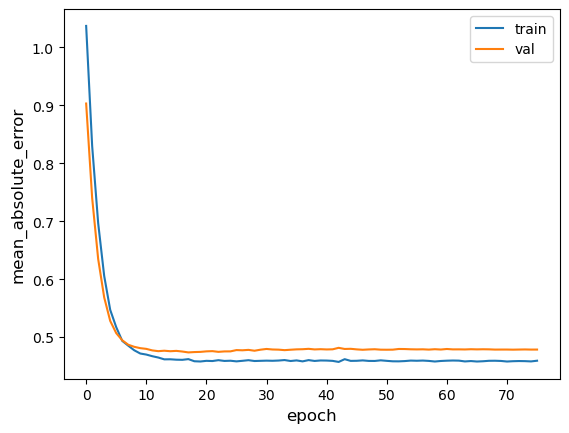

59/59 [==============================] - 0s 299us/step - loss: 1.0317 - mean_absolute_error: 0.8031
Test accuracy 0.8031100034713745
Test loss 1.0316535234451294


In [28]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [29]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [30]:
np.mean(y_test)

0.0831785220188552

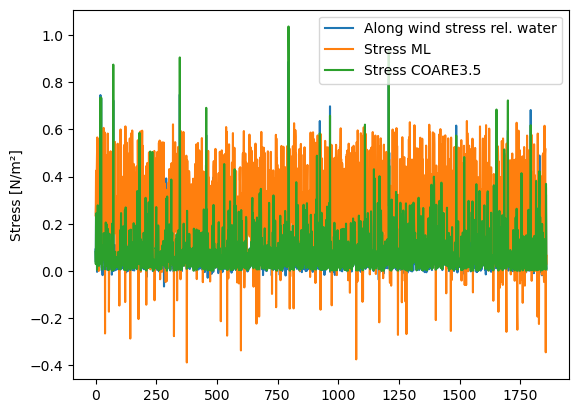

In [31]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

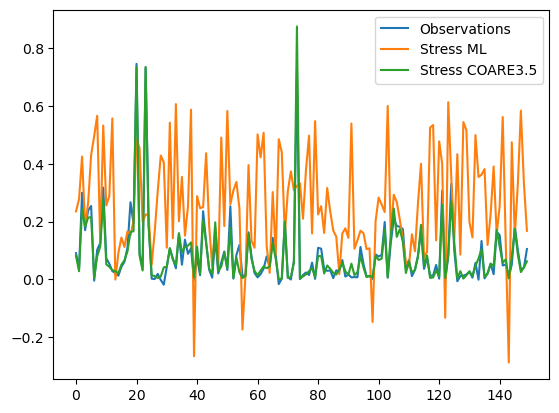

In [32]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

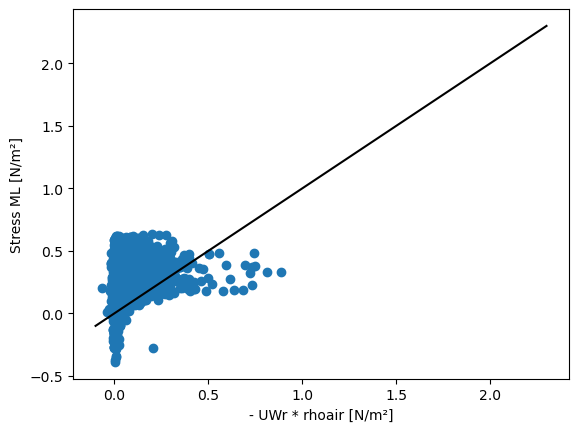

In [33]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

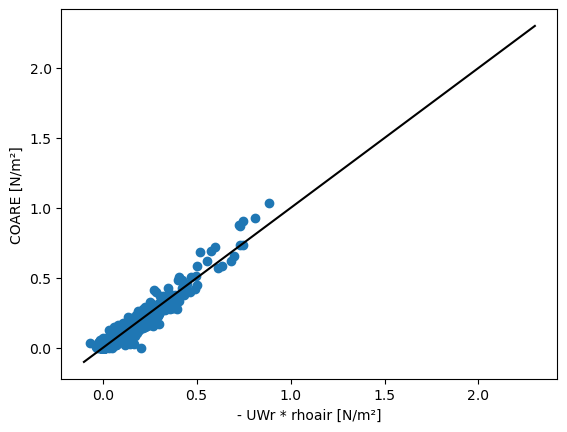

In [34]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [35]:
rmse(y_test.values, y_test_pred)

0.2673771223868999

In [36]:
rmse(y_test.values, c_test)

0.02575765121402028

## Correlation

In [37]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.16392774],
       [0.16392774, 1.        ]])

In [38]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

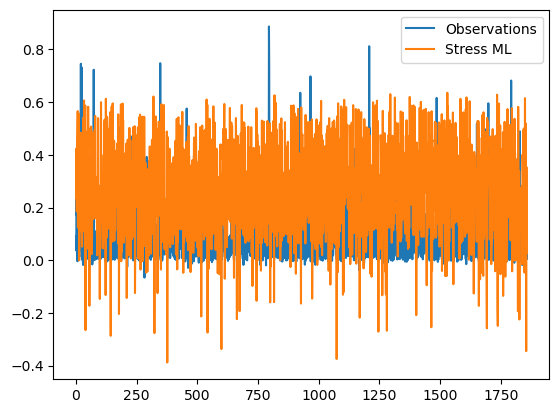

In [39]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.16392774],
       [0.16392774, 1.        ]])

In [41]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [42]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.2673771223868999

# Other experiments

In [43]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [44]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [45]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
183/183 [==============================] - 1s 1ms/step - loss: 1.7288 - mean_absolute_error: 0.9900 - val_loss: 1.0277 - val_mean_absolute_error: 0.7267
Epoch 2/500
183/183 [==============================] - 0s 702us/step - loss: 0.9259 - mean_absolute_error: 0.6897 - val_loss: 0.7913 - val_mean_absolute_error: 0.5985
Epoch 3/500
183/183 [==============================] - 0s 697us/step - loss: 0.6575 - mean_absolute_error: 0.5636 - val_loss: 0.6465 - val_mean_absolute_error: 0.5203
Epoch 4/500
183/183 [==============================] - 0s 711us/step - loss: 0.5660 - mean_absolute_error: 0.5094 - val_loss: 0.5640 - val_mean_absolute_error: 0.4791
Epoch 5/500
183/183 [==============================] - 0s 685us/step - loss: 0.5239 - mean_absolute_error: 0.4792 - val_loss: 0.5226 - val_mean_absolute_error: 0.4532
Epoch 6/500
183/183 [==============================] - 0s 724us/step - loss: 0.4897 - mean_absolute_error: 0.4426 - val_loss: 0.5015 - val_mean_absolute_error: 0.4427


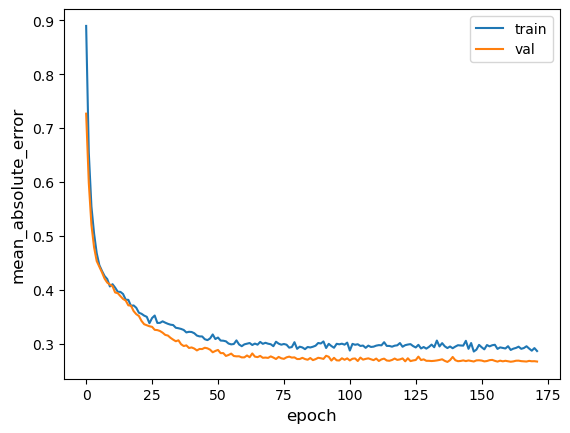

59/59 [==============================] - 0s 458us/step - loss: 8.4111 - mean_absolute_error: 1.8161
Test accuracy 1.8160842657089233
Test loss 8.411136627197266


In [46]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [47]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

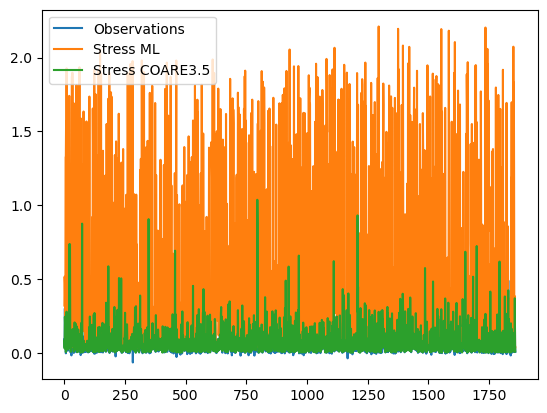

In [48]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

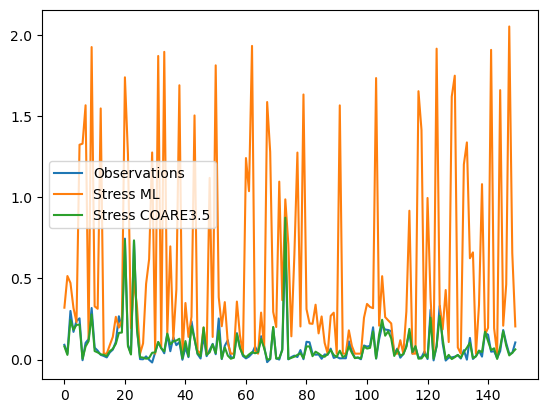

In [49]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [50]:
rmse(y_test.values, y_test_pred)

0.7414025701317624

## Correlation

In [51]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.11915318],
       [0.11915318, 1.        ]])

In [52]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [53]:
y_test.values.shape

(1859,)

In [54]:
y_test_pred[:, 0].shape

(1859,)

In [55]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [56]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.09077617, 0.03689986, 0.29968651, ..., 0.32256432, 0.0562417 ,
       0.00505536])

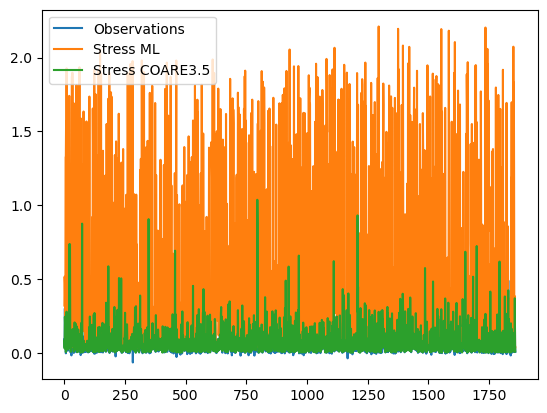

In [57]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

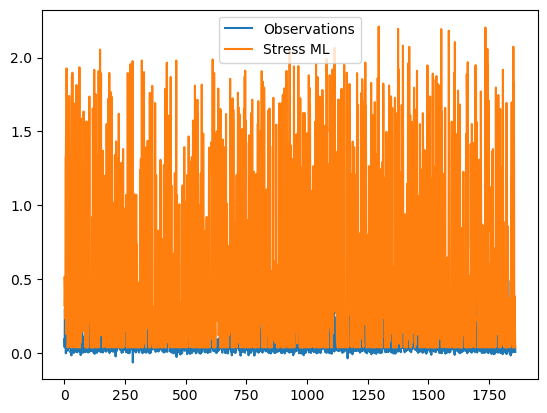

In [58]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [59]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [60]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.7414025701317624

Text(0, 0.5, 'Stress ML [N/m²]')

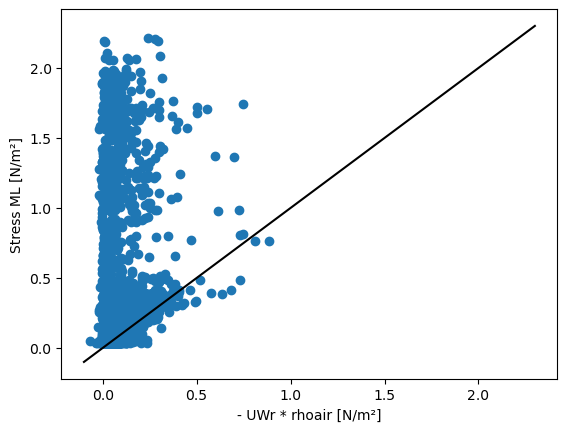

In [61]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [62]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [63]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [64]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
92/92 [==============================] - 0s 2ms/step - loss: 3.8618 - mean_absolute_error: 1.4084 - val_loss: 1.5284 - val_mean_absolute_error: 0.8062
Epoch 2/500
92/92 [==============================] - 0s 894us/step - loss: 2.3526 - mean_absolute_error: 1.1333 - val_loss: 1.2327 - val_mean_absolute_error: 0.7379
Epoch 3/500
92/92 [==============================] - 0s 905us/step - loss: 1.7265 - mean_absolute_error: 0.9559 - val_loss: 1.0517 - val_mean_absolute_error: 0.6808
Epoch 4/500
92/92 [==============================] - 0s 907us/step - loss: 1.3890 - mean_absolute_error: 0.8403 - val_loss: 0.9656 - val_mean_absolute_error: 0.6496
Epoch 5/500
92/92 [==============================] - 0s 890us/step - loss: 1.1881 - mean_absolute_error: 0.7762 - val_loss: 0.8938 - val_mean_absolute_error: 0.6162
Epoch 6/500
92/92 [==============================] - 0s 889us/step - loss: 1.1096 - mean_absolute_error: 0.7335 - val_loss: 0.8402 - val_mean_absolute_error: 0.5913
Epoch 7/500


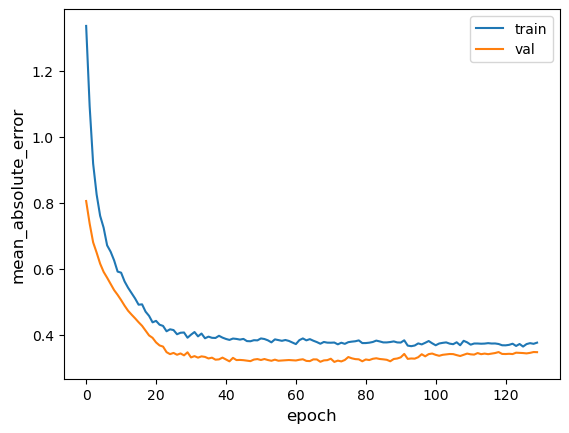

59/59 [==============================] - 0s 381us/step - loss: 3.7144 - mean_absolute_error: 1.3571
Test accuracy 1.357134222984314
Test loss 3.714445114135742


In [65]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [66]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [67]:
rmse(y_test.values, y_test_pred)

0.49874629632853235

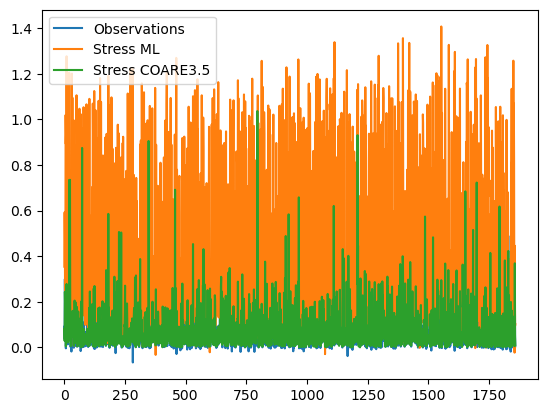

In [68]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

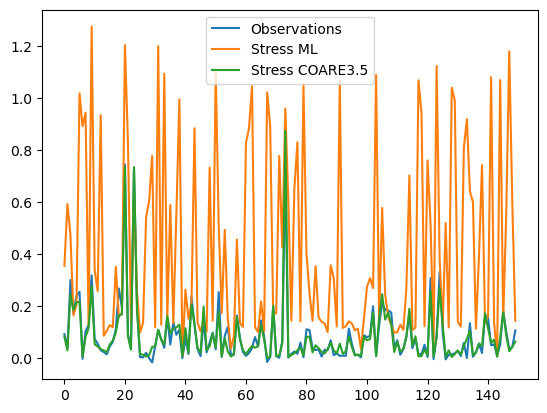

In [69]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

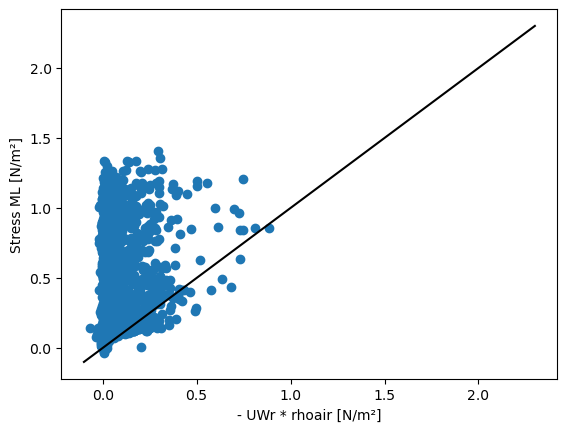

In [70]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [71]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.16938155],
       [0.16938155, 1.        ]])

In [72]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

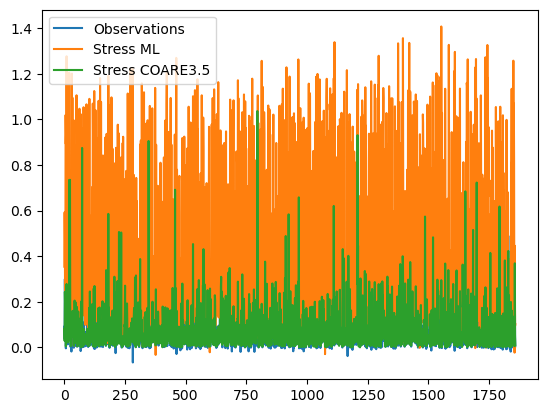

In [73]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

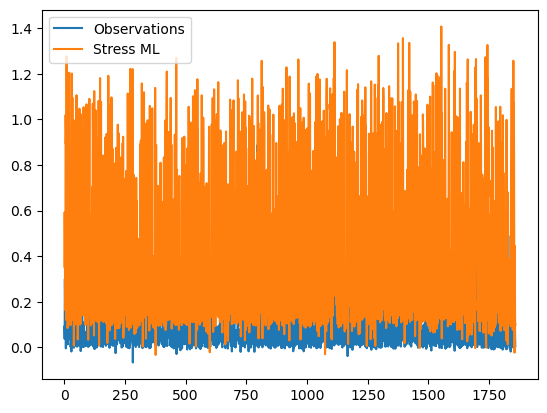

In [74]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [75]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [76]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.49874629632853235

Text(0, 0.5, 'Stress ML [N/m²]')

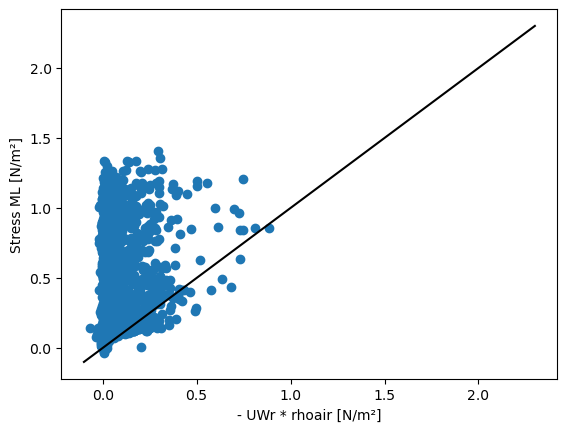

In [77]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

# Best model

In [78]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [79]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [80]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 43ms/step - loss: 10.2470 - mean_absolute_error: 2.1701 - val_loss: 1.0111 - val_mean_absolute_error: 0.6537
Epoch 2/500
12/12 [==============================] - 0s 30ms/step - loss: 1.4797 - mean_absolute_error: 0.9168 - val_loss: 0.9434 - val_mean_absolute_error: 0.6877
Epoch 3/500
12/12 [==============================] - 0s 30ms/step - loss: 1.3317 - mean_absolute_error: 0.7673 - val_loss: 0.9428 - val_mean_absolute_error: 0.6554
Epoch 4/500
12/12 [==============================] - 0s 32ms/step - loss: 0.9204 - mean_absolute_error: 0.6621 - val_loss: 0.9717 - val_mean_absolute_error: 0.7189
Epoch 5/500
12/12 [==============================] - 0s 32ms/step - loss: 0.9824 - mean_absolute_error: 0.6682 - val_loss: 0.9373 - val_mean_absolute_error: 0.5806
Epoch 6/500
12/12 [==============================] - 0s 31ms/step - loss: 0.8049 - mean_absolute_error: 0.6385 - val_loss: 0.9990 - val_mean_absolute_error: 0.7403
Epoch 7/500
12/

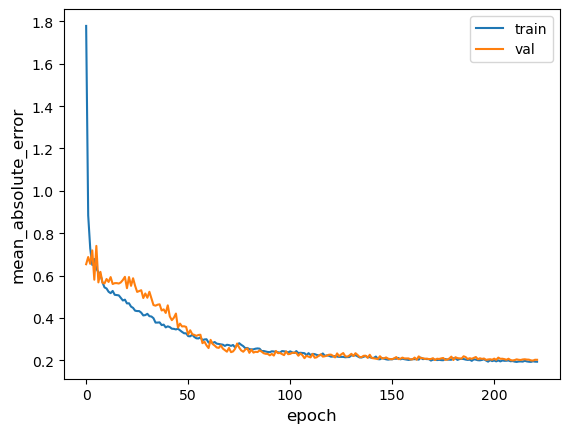

59/59 [==============================] - 0s 2ms/step - loss: 0.9096 - mean_absolute_error: 0.7119
Test accuracy 0.7118774056434631
Test loss 0.9095725417137146


In [81]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [82]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [83]:
rmse(y_test.values, y_test_pred)

0.2626092526529981

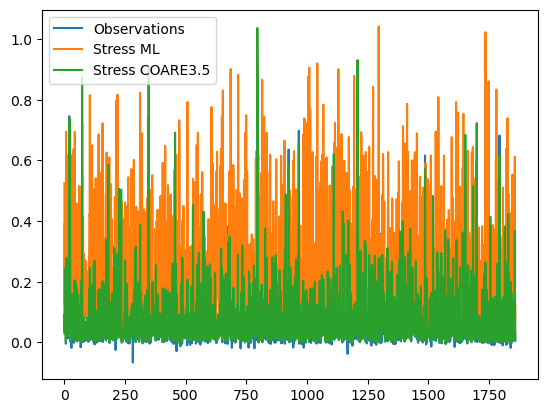

In [84]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

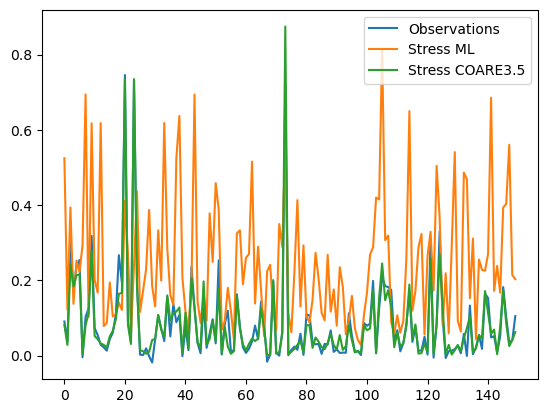

In [85]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [86]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.30252408],
       [0.30252408, 1.        ]])

In [87]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

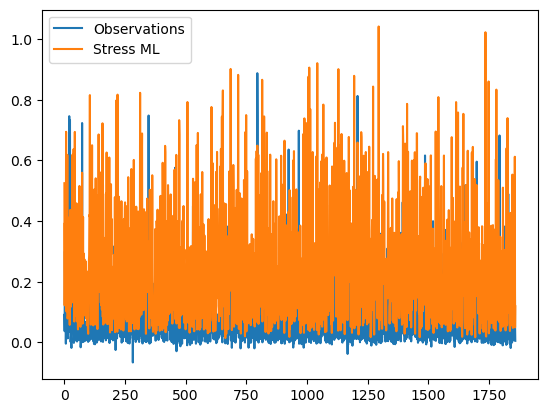

In [88]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [89]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [90]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2626092526529981

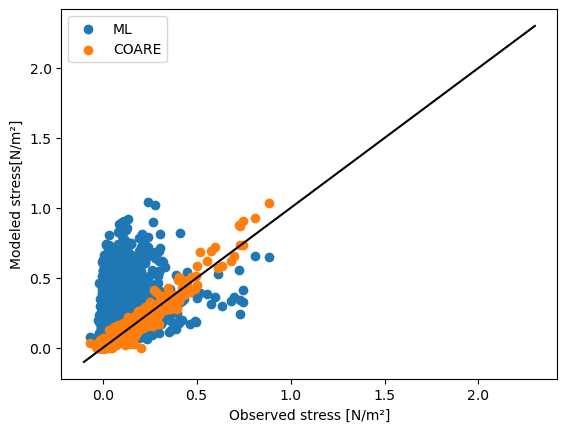

In [91]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

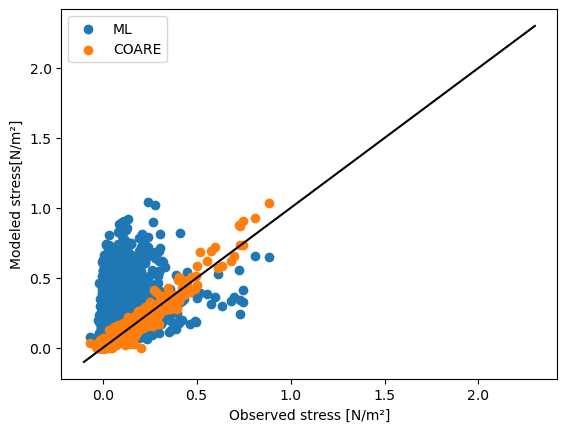

In [92]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [93]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [94]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [95]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 148ms/step - loss: 15.8870 - mean_absolute_error: 2.6035 - val_loss: 1.0324 - val_mean_absolute_error: 0.6501
Epoch 2/500
6/6 [==============================] - 1s 121ms/step - loss: 2.4081 - mean_absolute_error: 1.1531 - val_loss: 0.9348 - val_mean_absolute_error: 0.6849
Epoch 3/500
6/6 [==============================] - 1s 131ms/step - loss: 1.6157 - mean_absolute_error: 0.9259 - val_loss: 0.9230 - val_mean_absolute_error: 0.6669
Epoch 4/500
6/6 [==============================] - 1s 115ms/step - loss: 1.1405 - mean_absolute_error: 0.7794 - val_loss: 0.8322 - val_mean_absolute_error: 0.5859
Epoch 5/500
6/6 [==============================] - 1s 122ms/step - loss: 1.3405 - mean_absolute_error: 0.7968 - val_loss: 0.9537 - val_mean_absolute_error: 0.6390
Epoch 6/500
6/6 [==============================] - 1s 124ms/step - loss: 1.0055 - mean_absolute_error: 0.7303 - val_loss: 0.9231 - val_mean_absolute_error: 0.5817
Epoch 7/500
6/6 [====

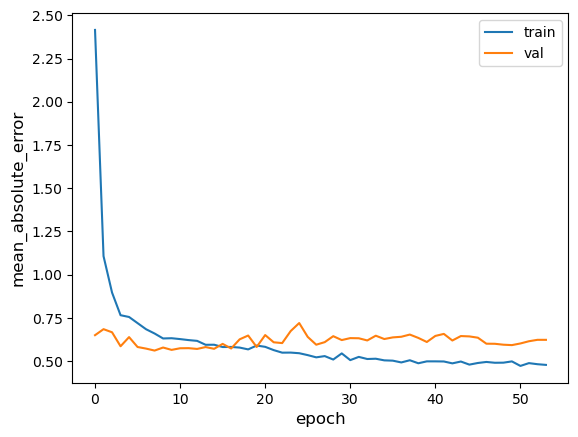

59/59 [==============================] - 0s 8ms/step - loss: 0.1745 - mean_absolute_error: 0.2607
Test accuracy 0.26066505908966064
Test loss 0.1745096743106842


In [96]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [97]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [98]:
rmse(y_test.values, y_test_pred)

0.1130186032097857

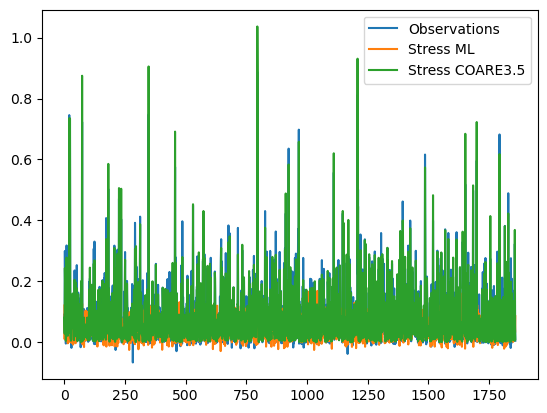

In [99]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

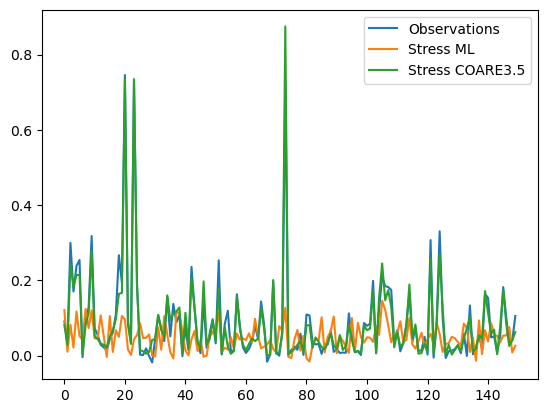

In [100]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [101]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.22904746],
       [0.22904746, 1.        ]])

In [102]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

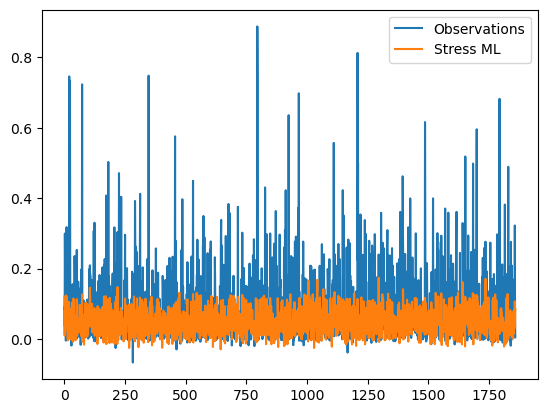

In [103]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [104]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [105]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.1130186032097857

Text(0, 0.5, 'Stress ML [N/m²]')

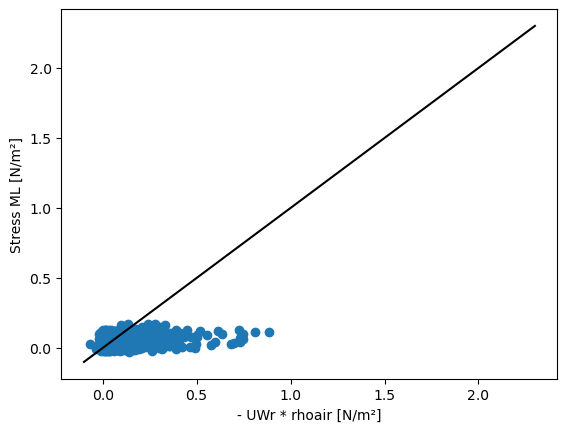

In [106]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [107]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [108]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [109]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 665ms/step - loss: 18.1975 - mean_absolute_error: 2.8702 - val_loss: 1.1602 - val_mean_absolute_error: 0.7179
Epoch 2/1000
3/3 [==============================] - 2s 596ms/step - loss: 2.5959 - mean_absolute_error: 1.2666 - val_loss: 1.1607 - val_mean_absolute_error: 0.6379
Epoch 3/1000
3/3 [==============================] - 2s 603ms/step - loss: 2.3318 - mean_absolute_error: 1.1468 - val_loss: 0.7916 - val_mean_absolute_error: 0.5686
Epoch 4/1000
3/3 [==============================] - 2s 603ms/step - loss: 1.7256 - mean_absolute_error: 0.9401 - val_loss: 0.7740 - val_mean_absolute_error: 0.5238
Epoch 5/1000
3/3 [==============================] - 2s 596ms/step - loss: 1.6053 - mean_absolute_error: 0.8371 - val_loss: 1.4584 - val_mean_absolute_error: 0.8413
Epoch 6/1000
3/3 [==============================] - 2s 591ms/step - loss: 1.3248 - mean_absolute_error: 0.8542 - val_loss: 2.0877 - val_mean_absolute_error: 1.1584
Epoch 7/1000
3/

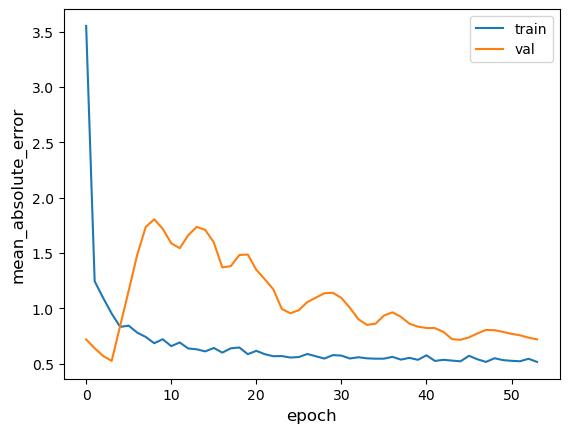

59/59 [==============================] - 2s 25ms/step - loss: 0.2047 - mean_absolute_error: 0.2791
Test accuracy 0.279089093208313
Test loss 0.2046852707862854


In [110]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [111]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [112]:
rmse(y_test.values, y_test_pred)

0.11781038657036025

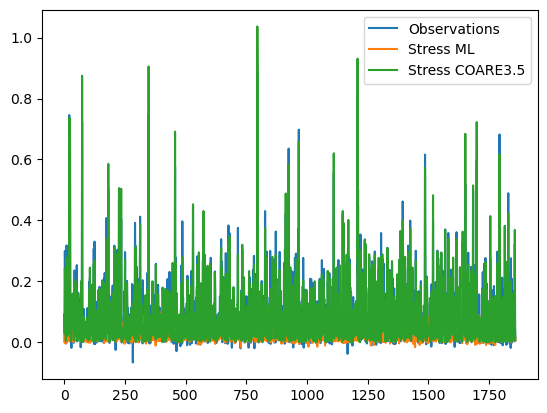

In [113]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

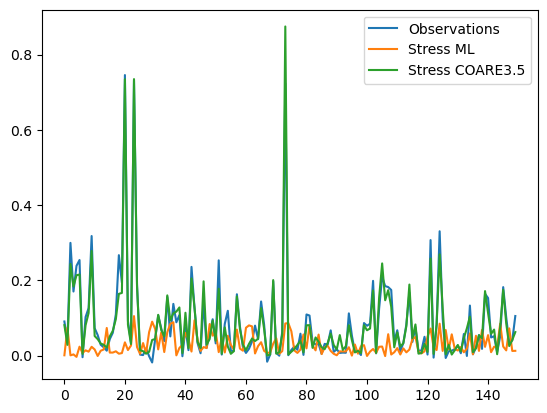

In [114]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [115]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.15772837],
       [0.15772837, 1.        ]])

In [116]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

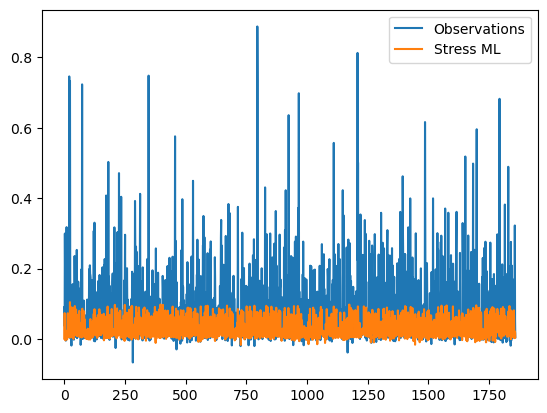

In [117]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [118]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [119]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.11781038657036025

Text(0, 0.5, 'Stress ML [N/m²]')

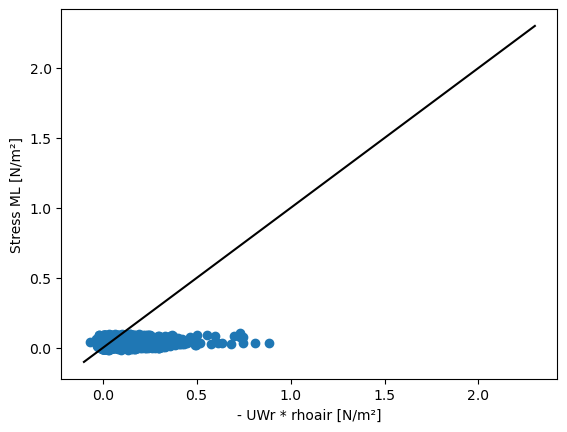

In [120]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [121]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [122]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [123]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 623ms/step - loss: 20.6252 - mean_absolute_error: 3.1770 - val_loss: 1.2999 - val_mean_absolute_error: 0.7822
Epoch 2/1000
3/3 [==============================] - 2s 582ms/step - loss: 2.9174 - mean_absolute_error: 1.3169 - val_loss: 0.8867 - val_mean_absolute_error: 0.5747
Epoch 3/1000
3/3 [==============================] - 2s 575ms/step - loss: 2.2590 - mean_absolute_error: 1.0461 - val_loss: 0.7351 - val_mean_absolute_error: 0.5989
Epoch 4/1000
3/3 [==============================] - 2s 563ms/step - loss: 1.5392 - mean_absolute_error: 0.8921 - val_loss: 0.7660 - val_mean_absolute_error: 0.6314
Epoch 5/1000
3/3 [==============================] - 2s 556ms/step - loss: 1.5553 - mean_absolute_error: 0.8372 - val_loss: 0.7832 - val_mean_absolute_error: 0.6055
Epoch 6/1000
3/3 [==============================] - 2s 564ms/step - loss: 1.5731 - mean_absolute_error: 0.8744 - val_loss: 0.7557 - val_mean_absolute_error: 0.5258
Epoch 7/1000
3/

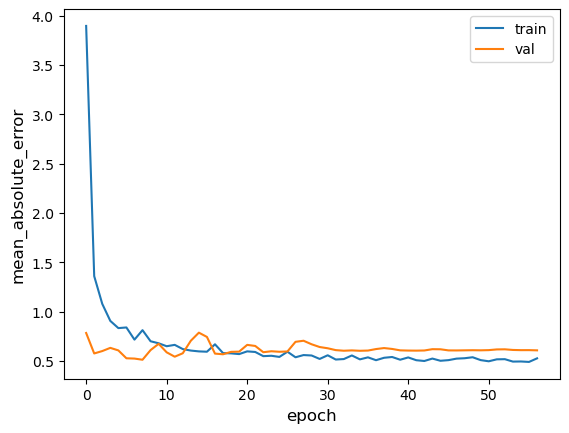

59/59 [==============================] - 1s 25ms/step - loss: 0.1500 - mean_absolute_error: 0.2806
Test accuracy 0.2806432843208313
Test loss 0.15001589059829712


In [124]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [125]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [126]:
rmse(y_test.values, y_test_pred)

0.1024882203704685

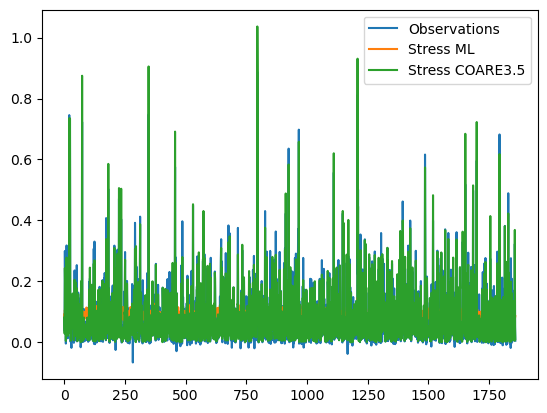

In [127]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

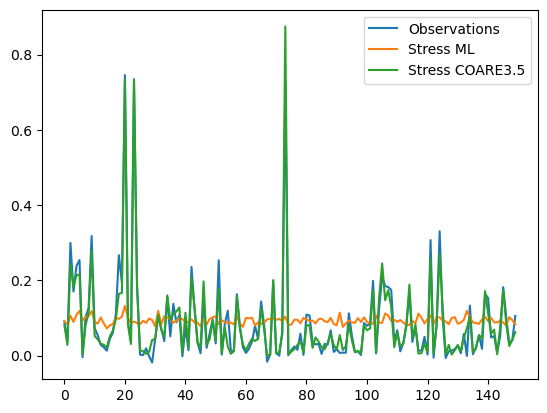

In [128]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [129]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.41281949],
       [0.41281949, 1.        ]])

In [130]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

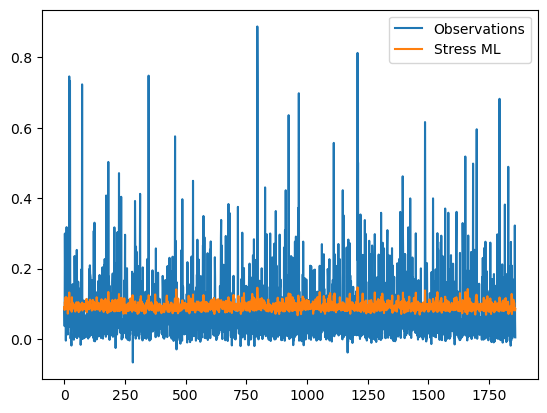

In [131]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [132]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [133]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.1024882203704685

Text(0, 0.5, 'Stress ML [N/m²]')

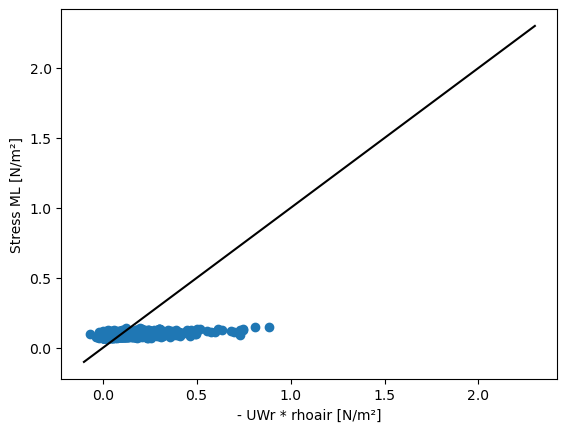

In [134]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [135]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [136]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [137]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 679ms/step - loss: 17.8636 - mean_absolute_error: 2.9595 - val_loss: 1.1275 - val_mean_absolute_error: 0.6751
Epoch 2/1000
3/3 [==============================] - 2s 627ms/step - loss: 2.5805 - mean_absolute_error: 1.2450 - val_loss: 0.8420 - val_mean_absolute_error: 0.5746
Epoch 3/1000
1/3 [=========>....................] - ETA: 1s - loss: 1.7822 - mean_absolute_error: 1.0391

KeyboardInterrupt: 

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [ ]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

In [ ]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

In [ ]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 